# SF Salaries Exercise



# **Load Necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ** Read Salaries.csv as a dataframe called sal.**

In [2]:
i=pd.read_csv('Salaries.csv')

# ** Check the head of the DataFrame. **

In [4]:
i.shape

(148654, 13)

In [5]:
# Check nan values
i.isnull().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,609
OvertimePay,4
OtherPay,4
Benefits,36163
TotalPay,0
TotalPayBenefits,0
Year,0


In [6]:
#total reords , rows and columns
i.shape


(148654, 13)

In [7]:
#check feature names
i.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [9]:
#drop Notes and Status columns
i.drop(['Notes','Status'],axis=1,inplace=True)

In [11]:
#check new shape
i.shape

(148654, 11)

In [12]:
#check columns
i.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [16]:
#fill BasePay NaN by using some technique
#i['BasePay'].fillna(i.BasePay.mean(),inplace=True)
i.fillna({'BasePay':i.BasePay.mean()},inplace=True)


In [18]:
i['BasePay'].isnull().sum()

np.int64(0)

# **What is the average BasePay ?**

In [19]:
i['BasePay'].mean()

np.float64(66325.44884048769)

# ** What is the highest amount of OvertimePay in the dataset ? **

In [26]:
i['OvertimePay'].max()

245131.88

## Fetch record of Highest paid employee

In [27]:
i.query('TotalPay==TotalPay.max()')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


## Fetch name of highest Overtime pay employee


In [31]:
i.query('OvertimePay==OvertimePay.max()')[['EmployeeName','OvertimePay']]

,EmployeeName,OvertimePay
1,GARY JIMENEZ,245131.88


# ** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [32]:
i.query('EmployeeName=="JOSEPH DRISCOLL"')[['EmployeeName','JobTitle']]

,EmployeeName,JobTitle
24,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION"


# ** How much does JOSEPH DRISCOLL make (including benefits)? **

In [39]:
i.query('EmployeeName=="JOSEPH DRISCOLL"')[['EmployeeName','TotalPay','Benefits','TotalPayBenefits']]

,EmployeeName,TotalPay,Benefits,TotalPayBenefits
24,JOSEPH DRISCOLL,270324.91,NaN,270324.91


# ** What is the name, Job title of highest paid person (including benefits)?**

In [40]:
i.query('TotalPayBenefits==TotalPayBenefits.max()')[['EmployeeName','JobTitle','TotalPayBenefits']]

,EmployeeName,JobTitle,TotalPayBenefits
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43


# ** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [41]:
i.query('TotalPayBenefits==TotalPayBenefits.min()')[['EmployeeName','JobTitle','TotalPayBenefits']]

,EmployeeName,JobTitle,TotalPayBenefits
148653,Joe Lopez,"Counselor, Log Cabin Ranch",-618.13


## Show me the records with totalpaybenefit less than or equal to 0


In [42]:
i.query('TotalPayBenefits<=0')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.00000,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.00000,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.00000,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
110528,110529,Timothy E Gibson,Police Officer 3,66325.44884,0.0,0.00,-2.73,0.00,-2.73,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,66325.44884,0.0,0.00,-8.20,0.00,-8.20,2013,San Francisco
110530,110531,David P Kucia,Police Officer 3,66325.44884,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
148626,148627,Paulet Gaines,Account Clerk,0.00000,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148627,148628,Brett A Lundberg,General Laborer,0.00000,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148628,148629,Mark W Mcclure,General Laborer,0.00000,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.00000,0.0,0.00,0.00,0.00,0.00,2014,San Francisco


# ** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [43]:
# Yearwise Average BasePay
i.groupby('Year')['BasePay'].mean()


,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,69576.866579
2014,66564.396851


# ** How many unique job titles are there? **

In [44]:
i['JobTitle'].nunique()

2159

# ** What are the top 5 most common jobs? **

In [46]:
i['JobTitle'].value_counts().head(5)

,count
JobTitle,
Transit Operator,7036
Special Nurse,4389
Registered Nurse,3736
Public Svc Aide-Public Works,2518
Police Officer 3,2421


In [47]:
# last five
i['JobTitle'].value_counts().tail(5)

,count
JobTitle,
Light Rail Vehicle Equip Eng,1
Civil Case Settlmnt Specialist,1
"ADMINISTRATOR, SFGH MEDICAL CENTER",1
CHIEF OF POLICE,1
Special Assistant 8,1


# How many are there those work as a POLICE OFFICER III

In [53]:
#i.query('JobTitle=="POLICE OFFICER III"').value_counts('Id').sum()
# or

i.query('JobTitle=="POLICE OFFICER III"').shape

(779, 11)

# In which department we have least employees?

In [57]:
i.groupby('JobTitle')['Id'].count().sort_values(ascending=True).head(5)

,Id
JobTitle,
ZOO CURATOR,1
"AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS",1
"AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI",1
"ADMINISTRATOR, SFGH MEDICAL CENTER",1
ASSESSOR,1


# Fetch record of year 2011 where Basepay 200000

In [62]:
i.query('Year==2011' and 'BasePay==200000')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


# How much average basepay is given to employees inthe year 2013

In [63]:
i.query('Year==2013').BasePay.mean()

np.float64(69576.86657949515)

# Plot.the % distribustion of Yearwise TotalPay

<Axes: ylabel='count'>

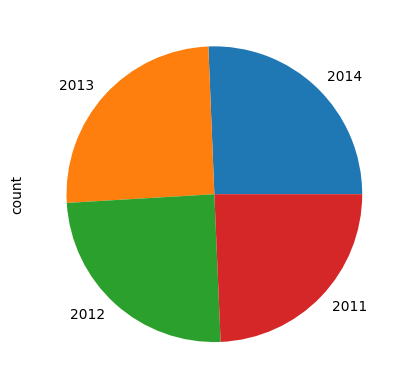

In [70]:
i['Year'].value_counts().plot(kind='pie')

# How many employees getting 0 overtimePay?

In [72]:
#i.query('OvertimePay==0').shape
#or
i.query('OvertimePay==0').value_counts('Id').sum()

np.int64(77321)

## Load data from Github